# Credit Score Prediction


## Data Description
- ID: Represents a unique identification of an entry
- Customer_ID: Represents a unique identification of a person
- Month: Represents the month of the year
- Name: Represents the name of a person
- Age: Represents the age of the person
- SSN: Represents the social security number of a person
- Occupation: Represents the occupation of the person
- Annual_Income: Represents the annual income of the person
- Monthly_Inhand_Salary: Represents the monthly base salary of a person
- Num_Bank_Accounts: Represents the number of bank accounts a person holds
- Num_Credit_Card: Represents the number of other credit cards held by a person
- Interest_Rate: Represents the interest rate on credit card
- Num_of_Loan: Represents the number of loans taken from the bank
- Type_of_Loan: Represents the types of loan taken by a person
- Delay_from_due_date: Represents the average number of days delayed from the    payment date
- Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
- Changed_Credit_Limit: Represents the percentage change in credit card limit
- Num_Credit_Inquiries: Represents the number of credit card inquiries
- Credit_Mix: Represents the classification of the mix of credits
- Outstanding_Debt: Represents the remaining debt to be paid
- Credit_Utilization_Ratio: Represents the utilization ratio of credit card
- Credit_History_Age: Represents the age of credit history of the person
- Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
- Total_EMI_per_month: Represents the monthly EMI payments
- Amount_invested_monthly: Represents the monthly amount invested by the customer
- Payment_Behaviour: Represents the payment behavior of the customer
- Monthly_Balance:Represents the monthly balance amount of the customer
- Credit_Score:Represents the bracket of credit score (Poor, Standard, Good) ((Target))


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/home/kartik/Documents/DBDA_PROJECT/credit/archive/train.csv");

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3526: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.shape

(100000, 28)

In [6]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [4]:
df.isnull().sum()/len(df)*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [5]:
dfnew=df.dropna()
dfnew

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [6]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53049 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        53049 non-null  object 
 1   Customer_ID               53049 non-null  object 
 2   Month                     53049 non-null  object 
 3   Name                      53049 non-null  object 
 4   Age                       53049 non-null  object 
 5   SSN                       53049 non-null  object 
 6   Occupation                53049 non-null  object 
 7   Annual_Income             53049 non-null  object 
 8   Monthly_Inhand_Salary     53049 non-null  float64
 9   Num_Bank_Accounts         53049 non-null  int64  
 10  Num_Credit_Card           53049 non-null  int64  
 11  Interest_Rate             53049 non-null  int64  
 12  Num_of_Loan               53049 non-null  object 
 13  Type_of_Loan              53049 non-null  object 
 14  Delay_

In [7]:
data_lost=(len(df)-len(dfnew))*100/len(df)
f"Data Lost-{data_lost:0.2f} %"

'Data Lost-46.95 %'

In [7]:
df.drop("Name",axis=1,inplace=True)


In [8]:
df.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Age                       100000 non-null  object 
 4   SSN                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  object 
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  object 
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  in

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


<Axes: >

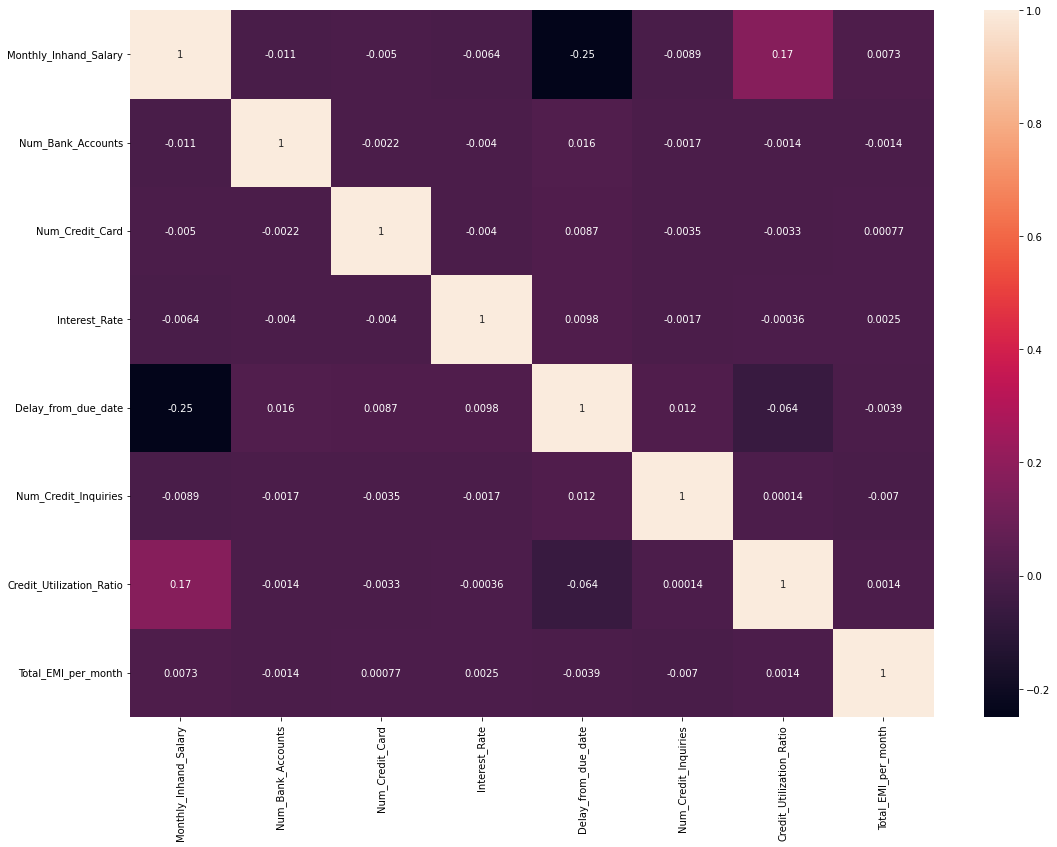

In [14]:
plt.figure(figsize=(18,13))
sns.heatmap(df.corr(),annot=True)

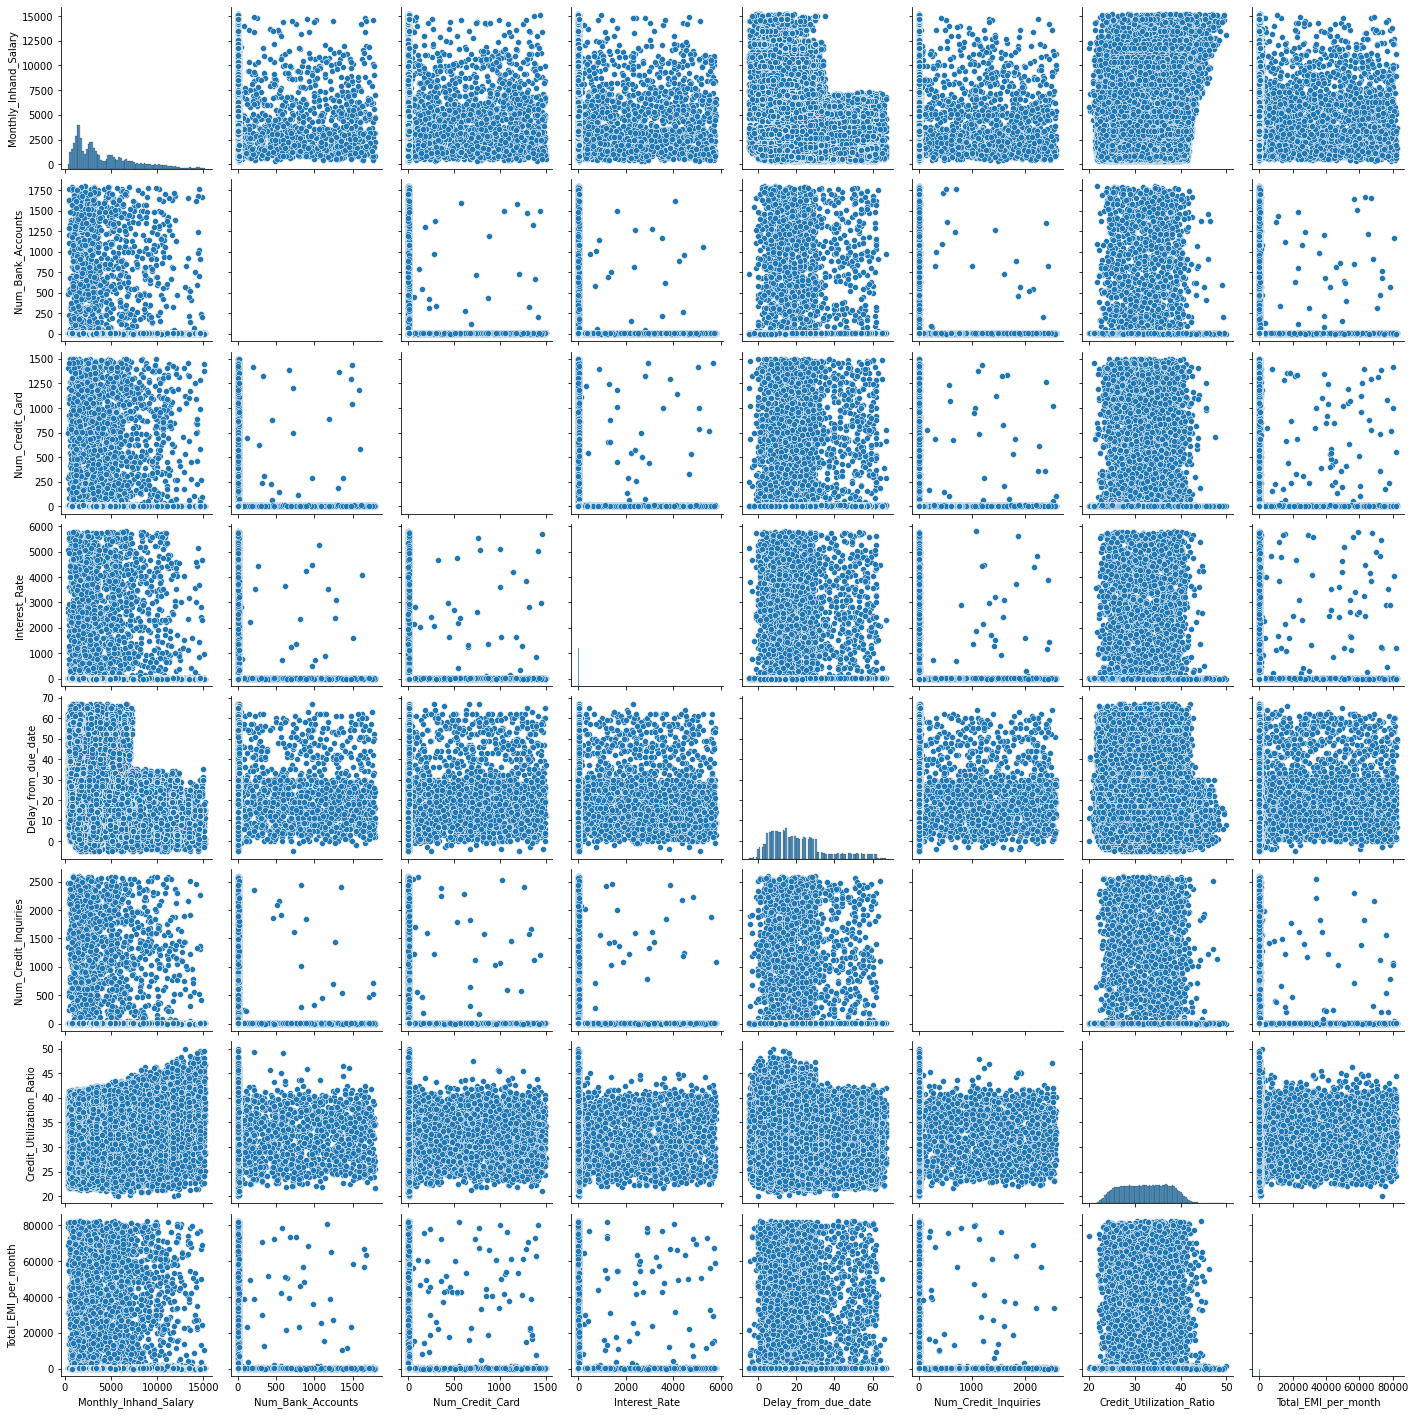

In [14]:
sns.pairplot(df)

In [19]:
df["Credit_Score"]

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["credit__score_label"]=lb.fit_transform(df["Credit_Score"])

In [21]:
df

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,credit__score_label
0,0x1602,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,0
1,0x1603,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,0
2,0x1604,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,0
3,0x1605,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,0
4,0x1606,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor,1
99996,0x25fea,CUS_0x942c,May,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor,1
99997,0x25feb,CUS_0x942c,June,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor,1
99998,0x25fec,CUS_0x942c,July,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard,2


good=0
standard=2
poor=1

In [11]:
df.drop("Credit_Score",axis=1,inplace=True)

<Axes: >

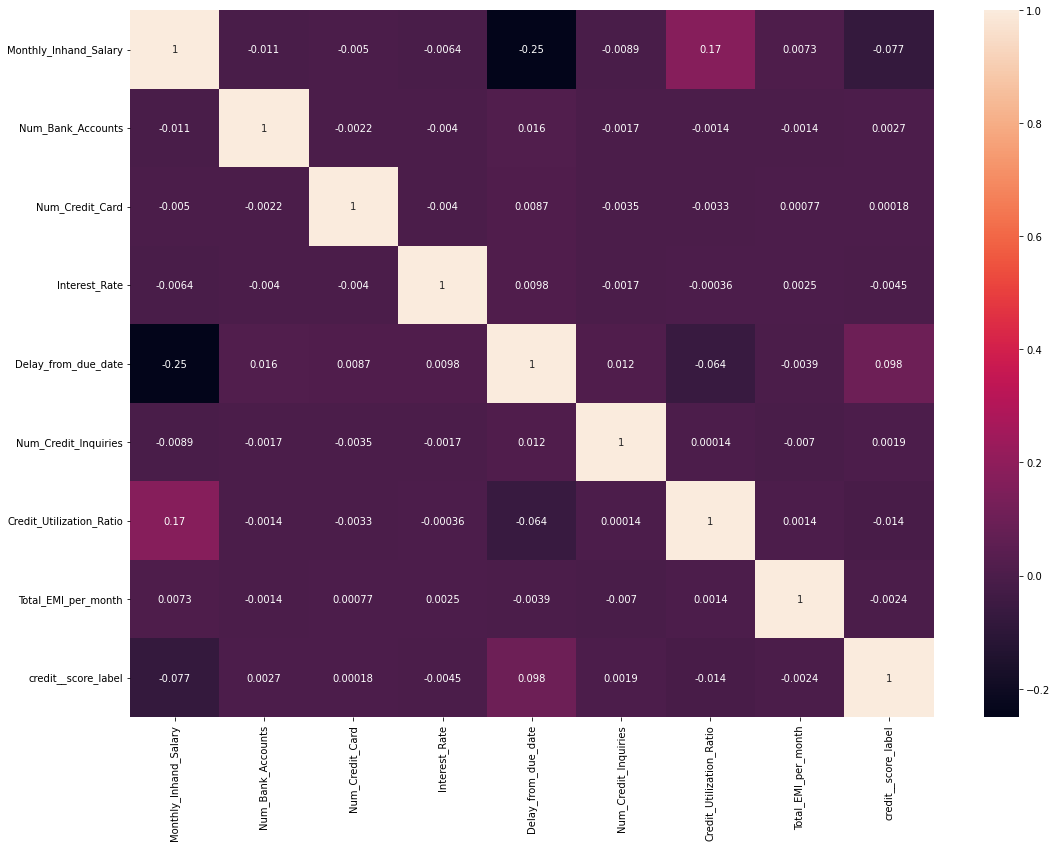

In [23]:
plt.figure(figsize=(18,13))
sns.heatmap(df.corr(),annot=True)

In [24]:
df["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

array([[<Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>],
       [<Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'credit__score_label'}>]], dtype=object)

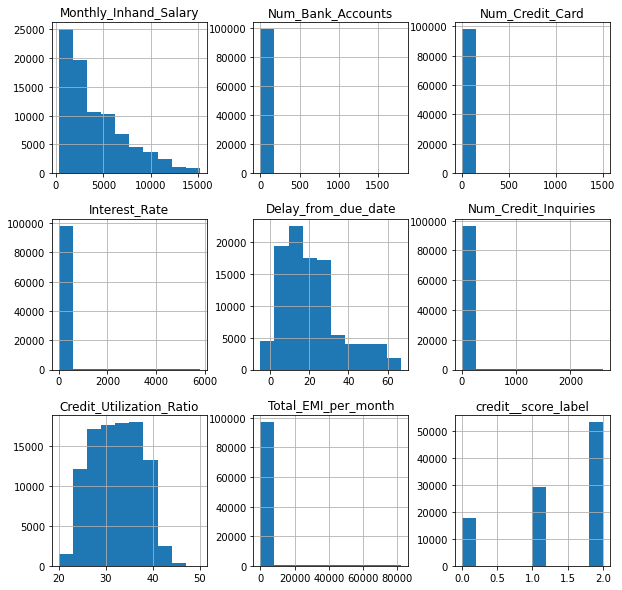

In [12]:
df.hist(figsize=(10,10))

In [13]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'credit__score_label'],
      dtype='object')

here a lot of columns are out of model scope ,redundant and not so useful in this particular context of the issue at the hand so we have to drop them,name column was already dropped

In [16]:
#Drop the column 

drop_df = df.drop(['ID','Customer_ID','Month','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Amount_invested_monthly'], axis=1).copy()
drop_df

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,credit__score_label
0,23,Scientist,19114.12,3,7,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,0
1,23,Scientist,19114.12,-1,NaN,4.0,Good,809.98,31.944960,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,0
2,-500,Scientist,19114.12,3,7,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,0
3,23,Scientist,19114.12,5,4,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,0
4,23,Scientist,19114.12,6,NaN,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,23,7,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,1
99996,25,Mechanic,39628.99,18,7,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,1
99997,25,Mechanic,39628.99,27,6,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,1
99998,25,Mechanic,39628.99,20,NaN,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,2
